# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata_start= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousedata_start.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
mousedata_start['Mouse ID'].unique().size

249

In [15]:
#  Mouse ID and Timepoint
unique_combinations = mousedata_start[['Mouse ID', 'Timepoint']].drop_duplicates()
unique_combinations_count = unique_combinations.shape[0]

# new column for combined Mouse ID and Timepoint
mousedata_start['mouse_timepoint'] = mousedata_start['Mouse ID'] + '_' + mousedata_start['Timepoint'].astype(str)

# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint.
duplicate_mouse_ids = mousedata_start[mousedata_start.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Our data should be uniquely identified by Mouse ID and Timepoint
unique_combinations = mousedata_start[['Mouse ID', 'Timepoint']].drop_duplicates()
unique_combinations_count = unique_combinations.shape[0]
print("Number of unique combinations of Mouse ID and Timepoint:", unique_combinations_count)

# Create a new column for combined Mouse ID and Timepoint
mousedata_start['mouse_timepoint'] = mousedata_start['Mouse ID'] + '_' + mousedata_start['Timepoint'].astype(str)

# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint.
duplicate_mouse_ids = mousedata_start[mousedata_start.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)

Number of unique combinations of Mouse ID and Timepoint: 1888
Duplicate Mouse IDs: ['g989']


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the DataFrame to get all data for the duplicate Mouse IDs
duplicate_mouse_data = mousedata_start[mousedata_start['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
print("Data for Duplicate Mouse IDs:")
print(duplicate_mouse_data)

Data for Duplicate Mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [17]:
cleaned_mouse_data = mousedata_start.drop_duplicates(subset='Mouse ID', keep='first')

# Print the cleaned DataFrame
print(cleaned_mouse_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites mouse_timepoint  
0                   45.0                 0          k403_0  
1

In [18]:
# Count the number of unique mice in the clean DataFrame
unique_mice_count = cleaned_mouse_data['Mouse ID'].nunique()

# Print the number of unique mice
print("Number of unique mice:", unique_mice_count)

Number of unique mice: 249


## Summary Statistics

In [19]:
# Group the data by 'Drug Regimen'
grouped_data = cleaned_mouse_data.groupby('Drug Regimen')

# Calculate the required summary statistics
summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']

# Print the summary statistics table
print(summary_statistics)

              Mean  Median  Variance  Std Dev  SEM
Drug Regimen                                      
Capomulin     45.0    45.0       0.0      0.0  0.0
Ceftamin      45.0    45.0       0.0      0.0  0.0
Infubinol     45.0    45.0       0.0      0.0  0.0
Ketapril      45.0    45.0       0.0      0.0  0.0
Naftisol      45.0    45.0       0.0      0.0  0.0
Placebo       45.0    45.0       0.0      0.0  0.0
Propriva      45.0    45.0       0.0      0.0  0.0
Ramicane      45.0    45.0       0.0      0.0  0.0
Stelasyn      45.0    45.0       0.0      0.0  0.0
Zoniferol     45.0    45.0       0.0      0.0  0.0


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [21]:
# Calculate the summary statistics using the agg() method
summary_statistics = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

# Print the summary statistics table
print(summary_statistics)



              Mean  Median  Variance  Std_Dev  SEM
Drug Regimen                                      
Capomulin     45.0    45.0       0.0      0.0  0.0
Ceftamin      45.0    45.0       0.0      0.0  0.0
Infubinol     45.0    45.0       0.0      0.0  0.0
Ketapril      45.0    45.0       0.0      0.0  0.0
Naftisol      45.0    45.0       0.0      0.0  0.0
Placebo       45.0    45.0       0.0      0.0  0.0
Propriva      45.0    45.0       0.0      0.0  0.0
Ramicane      45.0    45.0       0.0      0.0  0.0
Stelasyn      45.0    45.0       0.0      0.0  0.0
Zoniferol     45.0    45.0       0.0      0.0  0.0


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

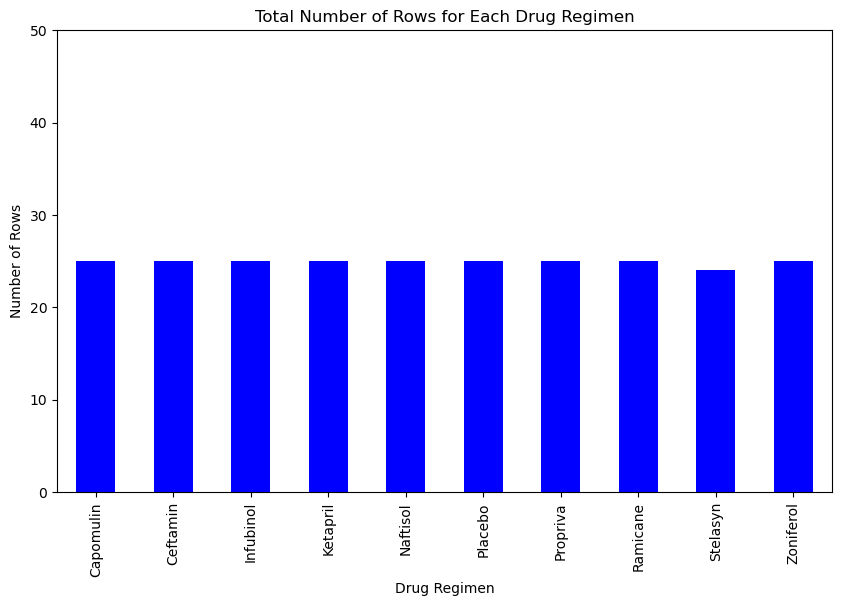

In [35]:


# Generate a bar plot using Pandas
regimen_counts=cleaned_mouse_data.groupby('Drug Regimen').size()
ax = regimen_counts.plot(kind='bar', color='blue', figsize=(10, 6))
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')
ax.set_xticklabels(regimen_counts.index, rotation=90)

# Set specific minimum and maximum values for the y-axis
ax.set_ylim(0, 50)  # Adjust the values as needed

# Show the plot
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


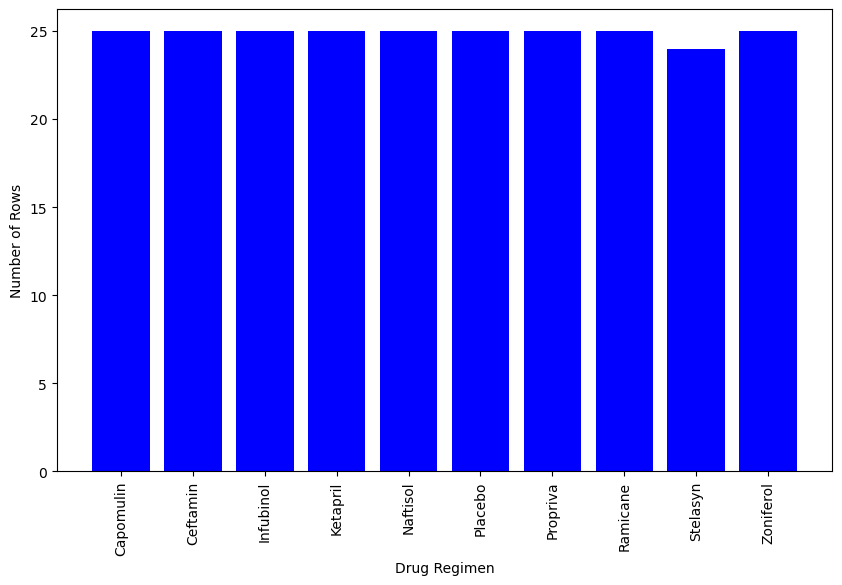

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group the cleaned DataFrame by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = cleaned_mouse_data.groupby('Drug Regimen').size()

# Create a bar plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)

# Show the plot
plt.show()

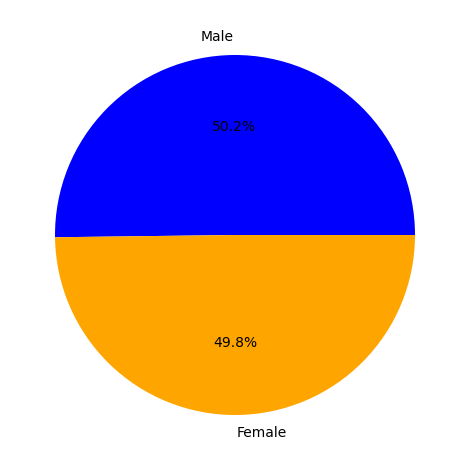

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_distribution = cleaned_mouse_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('')  # Remove y-label
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


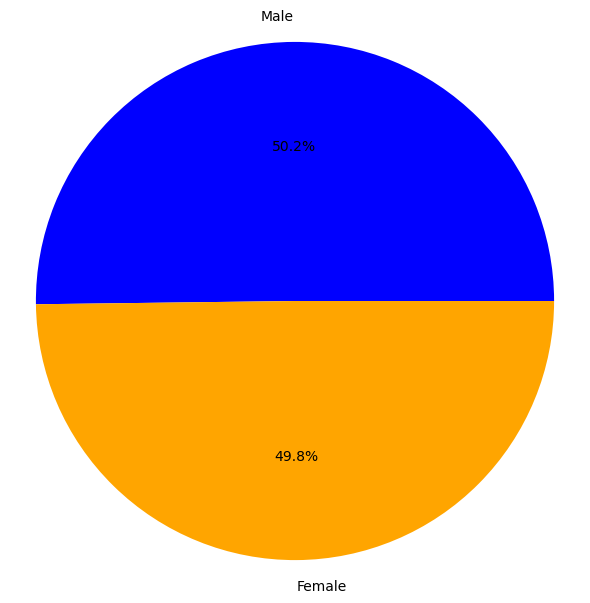

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the number of female and male mice
gender_distribution = cleaned_mouse_data['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# List of the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the cleaned DataFrame to include only the selected treatment regimens
selected_treatments_df = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'].isin(selected_regimens)]

# Group by 'Mouse ID' and find the maximum timepoint for each mouse
last_timepoint_df = selected_treatments_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint_df with the original DataFrame to get the final tumor volume
final_tumor_volume_df = pd.merge(last_timepoint_df, selected_treatments_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume
print("Final Tumor Volume for Selected Treatment Regimens:")
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


Final Tumor Volume for Selected Treatment Regimens:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol                45.0
1      a251    Infubinol                45.0
2      a275     Ceftamin                45.0
3      a411     Ramicane                45.0
4      a444     Ramicane                45.0
..      ...          ...                 ...
95     y769     Ceftamin                45.0
96     y793    Capomulin                45.0
97     y865     Ceftamin                45.0
98     z578     Ramicane                45.0
99     z581    Infubinol                45.0

[100 rows x 3 columns]


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# List of the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each regimen
tumor_volume_data = []

# Loop through each treatment regimen
for regimen in selected_regimens:
    # Locate the rows containing mice on the current regimen and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and determine potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine and display potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential outliers for {regimen}: {outliers.tolist()}\n")

Potential outliers for Capomulin: []

Potential outliers for Ramicane: []

Potential outliers for Infubinol: []

Potential outliers for Ceftamin: []



In [ ]:

#treatments into a list for the for loop (and later for plot labels)
treatments = cleaned_mouse_data['Drug Regimen'].unique()

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the subset of tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"Potential outliers for {treatment}: {potential_outliers}")



Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Placebo: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Stelasyn: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Zoniferol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ketapril: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Propriva: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Naftisol: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


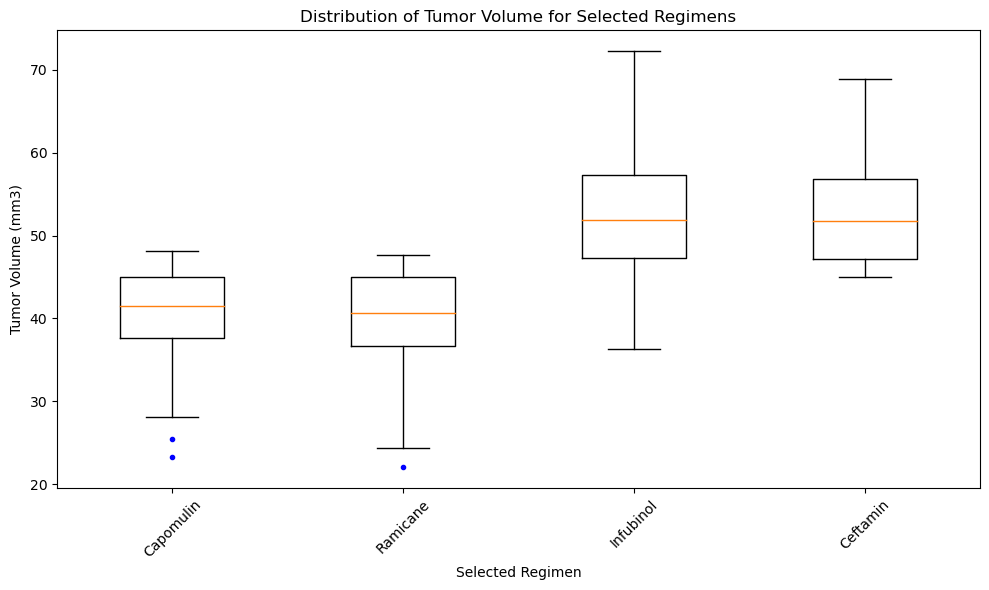

In [ ]:
# Define the list of selected regimens for the box plot
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each selected regimen
for regimen in selected_regimens:
    # Locate the rows which contain mice on each regimen and get the tumor volumes
    regimen_data = mousedata_start[mousedata_start['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Add the subset of tumor volume data to the list
    tumor_vol_data.append(regimen_data)

# Generate a box plot using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=selected_regimens, sym='b.')
plt.title('Distribution of Tumor Volume for Selected Regimens')
plt.xlabel('Selected Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()







In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

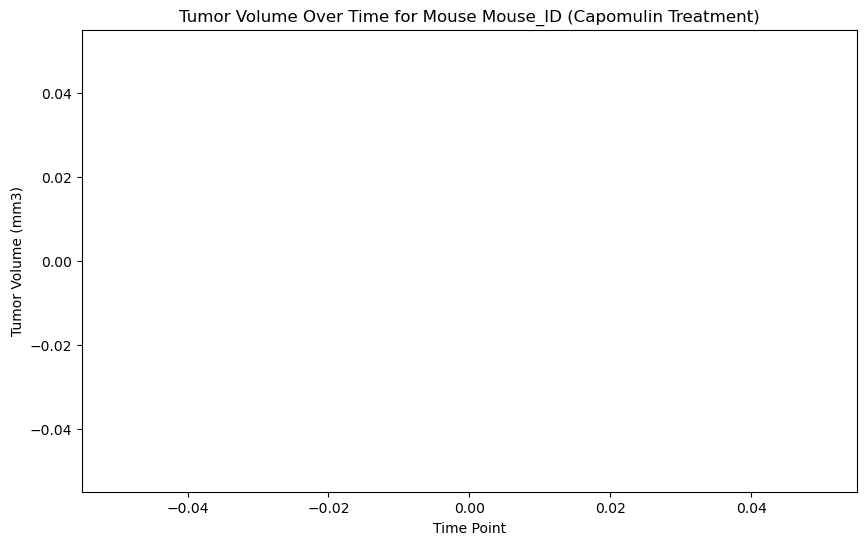

In [42]:

# Select a single mouse treated with Capomulin
selected_mouse = 'Mouse_ID'
cleaned_mouse_data = mousedata_start.loc[
    (mousedata_start['Mouse ID'] == selected_mouse) & 
    (mousedata_start['Drug Regimen'] == 'Capomulin')
]

# Generate a line plot of tumor volume versus time point for that mouse
plt.figure(figsize=(10, 6))
plt.plot(cleaned_mouse_data['Timepoint'], cleaned_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin Treatment)')

# Show the plot
plt.show()


In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


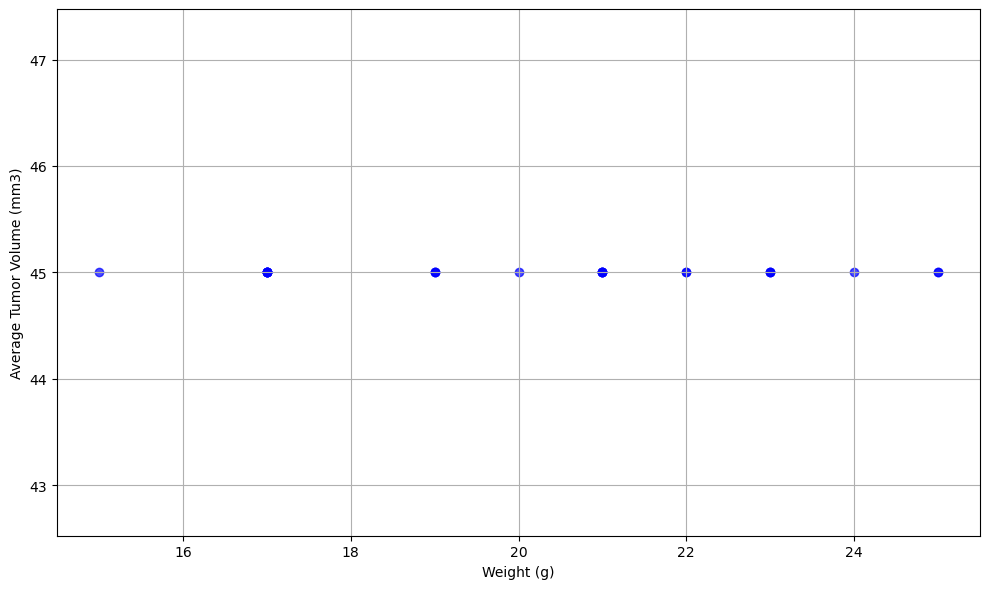

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regiment
import matplotlib.pyplot as plt
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Create a scatter plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='b', alpha=0.7)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

/Users/joymickle/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/joymickle/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


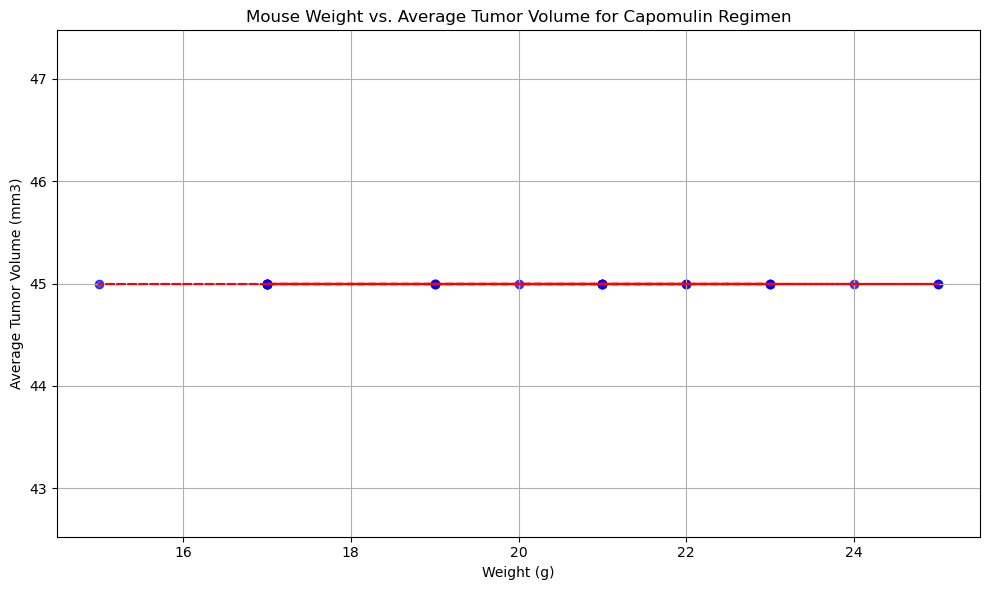

Correlation Coefficient: nan


In [ ]:


# Filter the cleaned_mousedata to include only Capomulin treatment
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='b', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
regress_values = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regress_values, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


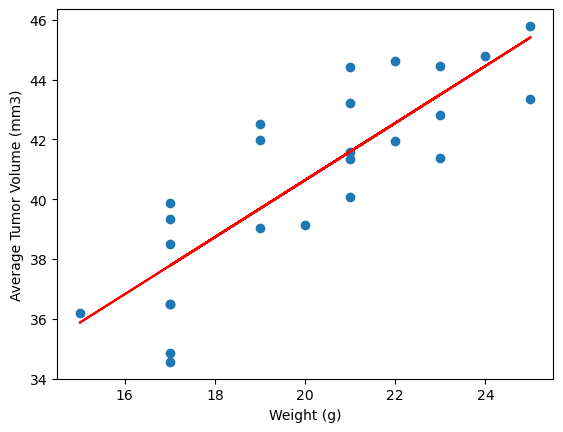

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
